# TIM - TP 6 : Un peu de couleurs en cette période grise...

Aujourd'hui, on oublie les images en niveaux de gris, et on passe aux images couleurs. Pourquoi passer à la couleur ? Pourquoi abandonner les images en niveaux de gris ? Que se cache derrière les canaux R,G,B ? Vous le saurez aujourd'hui dans ce TP....

In [ ]:
# A COMPLETER
# Chargement des librairies
...

# Définition du chemin de votre base d'images
path_images = ...

## Ex. 0 : Comment ça ? Il y a d'autres espaces de couleurs autres que RGB ?

Et oui ! On connaît le fameux espace de couleur RGB, mais il en existe plein d'autres. Pour ce TP, on va en découvrir quelques uns. Mais d'abord, choississons une image couleur à étudier (crayons.jpg aujourd'hui). Chargez là, et affichez la (attention, je veux obligatoirement un affichage en RGB !!)

In [ ]:
# A COMPLETER
# Chargement de l'image, conversion RGB et affichage
...

Durant ce TP, nous allons découvrir plusieurs espaces de couleurs, leur utilité et leurs particularités. Vous vous en doutez, OpenCV fait tout, et notamment les conversions dans différents espaces de couleur. Maintenant, comme c'est un TP, je vous demande de développer les conversions vous-même, mais on fera une comparaison avec les conversions via OpenCV.

## Ex. 1 : CMYK, on commence tranquille

Commençons avec l'espace de couleur CMYK (pour Cyan, Magenta, Yellow et blacK). Celui-ci, vous le connaissez, c'est utilisé pour les impressions. Le principe, c'est que contrairement à RGB, où la synthèse est additive (on part d'une image RGB et on ajoute les composante Red/Green/Blue); ici, la synthèse est soustractive (on part d'une image blanche et on soustrait les composantes Cyan/Magenta/Yellow/Black). 

Comme pour RGB, on a 3 composantes couleurs : Cyan, Magenta et Yellow. Cependant, les encres colorées sont plus coûteuses à produire. De ce fait, on utilise une 4ème composante : Black. Cette composante est équivalente à un mélange des 3 composantes colorées. De ce fait, on utilise moins d'encre, et on gagne en coût.

La conversion n'est pas disponible via OpenCV, mais elle reste assez simple pour autant, avec *r*, *g* et *b* les composantes Red, Green et Blue normalisées (float entre 0 et 1) :

\begin{equation*}
k = 1-max(r,g,b) \\
\end{equation*}

\begin{equation*}
c = 1-r-k \\
\end{equation*}

\begin{equation*}
m = 1-g-k \\
\end{equation*}

\begin{equation*}
y = 1-b-k \\
\end{equation*}


Créez une fonction de conversion d'une image RGB en format de couleur CMYK.

In [ ]:
# A COMPLETER
# Fonction de conversion de l'image RGB en CMYK
...

# Conversion RGB->CMYK de notre image du jour
...

Affichez le résultat channel par channel. 

*Note : Attention, ici, on va affichez le résultat comme dans le cadre d'une impression : On part d'une image blanche à 3 canaux (comme une feuille blanche), et on soustrait sur le canal correspondant une composante couleur.*

In [ ]:
# A COMPLETER
# Affichage du résultat channel par channel sur une image blanche
...

Et pour finir tranquillement cet exercice, recréez l'image RGB de base en développant la fonction de conversion CMYK -> RGB.

*Note : deux manières de voir la conversion : soit vous recalculez les canaux R,G,B en fonction de C,M,Y,K, soit vous reproduisez le processus d'une imprimante en partant d'une image blanche où vous rajoutez les encres une à une.*

In [ ]:
# A COMPLETER
# Fonction de conversion CMYK -> RGB
...

# Conversion CMYK->RGB de l'image cmyk
...

# Affichage de l'image
...

## Ex. 2 : YUV

Continuons ce TP avec l'espace de couleur YUV. Cet espace de couleurs a été conçu en 1960 pour une raison très précise. A cette époque, les premières télévisions couleurs apparaissent, et les chaînes de télévision doivent donc envoyer un signal pour 2 types de télévisions différentes : les télévisions couleurs et les télévisions Noir et Blanc. Cependant, les plus anciennes télévisions ne sont pas adaptées pour traiter un signal différent que ceux qu'elles recevaient avant : on ne peut donc envoyer un signal style RGB et faire la conversion en N&B à la réception. Pour cela, il fallait envoyer un signal comprenant l'info en niveau de gris, comme auparavant, mais avec des autres composantes pour afficher la couleur pour les télévisions qui le peuvent. 

Pour cela, l'espace de couleur YUV a été créé. Il est composé d'une composante luminance (Y) contenant l'information en N&B, et 2 composantes chrominances (U et V) contenant l'information couleur. Par exemple, dans la plage suivante, les composantes U et V permettent de caractériser ces couleurs, pour Y = 0.5. Ce que cela veut dire, c'est que toutes ces couleurs converties en N&B donneront uniquement 0.5, soit Y.

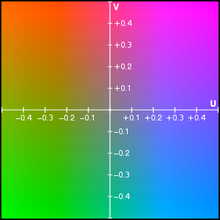

Pour ce faire, on va utiliser les formules suivantes, avec *r*, *g* et *b* les composantes Red, Green et Blue normalisées (float entre 0 et 1) :

\begin{equation*}
y = 0.299 \times r + 0.587 \times g + 0.114 \times b
\end{equation*}

\begin{equation*}
u = 0.492 \times (b - y)
\end{equation*}

\begin{equation*}
v = 0.877 \times (r - y)
\end{equation*}

Développez la fonction de conversion RGB -> YUV manuellement (en reprenant les formules précédentes).

In [ ]:
# A COMPLETER
# Fonction de conversion manuelle de l'image RGB -> YUV
...

# Conversion manuelle RGB -> YUV de notre image RGB du jour
...

**_QUESTION :_** Quels sont les ranges des canaux Y, U et V ? (valeur min possible -> valeur max possible)

**_REPONSE :_** 

Effectuez ensuite une conversion RGB -> YUV via OpenCV.

In [ ]:
# A COMPLETER
# Conversion de l'image RGB en YUV via OpenCV
...

Affichez le résultat channel par channel des résultats obtenus (manuels et OpenCV).

*Note : N'oubliez pas de préciser la range. Et attention, on n'a pas les mêmes valeurs et types de données entre les deux conversions réalisées...*

In [ ]:
# A COMPLETER
# Affichage des résultats channel par channel
...

Maintenant, l'objectif va être de recréer l'image RGB à partir de l'image YUV que nous avons calculé auparavant, comme le faisaient les télévisions couleurs à l'ancienne époque.

**_QUESTION :_** A partir des formules décrite précédemment, quelles opérations doivent être réalisées pour obtenir les canaux R/G/B à partir des canaux Y/U/V ?

**_REPONSE :_**


Développez la fonction de conversion inverse YUV -> RGB, appliquez sur votre image et affichez le résultat

In [ ]:
# A COMPLETER
# Fonction de conversion manuelle YUV -> RGB de l'image et affichage du résultat
...

# Conversion manuelle YUV -> RGB de notre image 
...

# Affichage du résultat
...

## Ex. 3 : HSV

Poursuivons avec l'espace de couleur HSV (pour Hue, Saturation et Value) ou TSI en français (Teinte, Saturation, Intensité). Comme RGB, on a également 3 canaux définis de la manière suivante :
- La teinte (Hue) est codée suivant l'angle qui lui correspond sur le cercle des couleurs (de 0 à 360°).
- La saturation (Saturation) est l'intensité de la couleur (de 0 à 100%).
- La valeur (Value) est la brillance de la couleur (de 0 à 100%).

<img src="HSVCone.png" alt="Description" width="800" height="600">

On peut convertir une image RGB en image HSV grâce aux formules suivantes (*r* ,*g* et *b* sont respectivement les canaux Red, Green et Blue normalisés de notre image RGB ; *h*, *s* et *v* sont les canaux Hue, Saturation et Value normalisés de notre image HSV) :

\begin{equation*}
max\_rgb = max(r,g,b) \\
\end{equation*}


\begin{equation*}
min\_rgb = min(r,g,b) \\
\end{equation*}


\begin{equation*}
h=
\begin{cases}
0, & si \max = \min \\
(60^\circ \times \frac{g - b}{\max - \min} + 360^\circ)\;\bmod\;360^\circ,   & si \max = r \\
60^\circ \times \frac{b - r}{\max - \min} + 120^\circ, & si \max = g \\
60^\circ \times \frac{r - g}{\max - \min} + 240^\circ, & si \max = b \\
\end{cases} \\
\end{equation*}

\begin{equation*}
s = 
\begin{cases}
0, & si \max = 0 \\
1 - \frac {min\_rgb} {max\_rgb}, & sinon
\end{cases} \\
\end{equation*}

\begin{equation*}
v = max\_rgb
\end{equation*}

Notez juste que dans le cadre de notre implémentation, il faudra également qu'on divise notre canal *h* par 2 pour avoir une valeur entre 0 et 180° (histoire d'avoir nos images codées en uint8).

Développez la fonction de conversion RGB-> HSV en reprenant les formules ci-dessus.

In [ ]:
# A COMPLETER   
# Fonction de conversion RGB -> HSV (manuel)
...

# Conversion RGB -> HSV de l'image RGB
...

Effectuez maintenant une conversion RGB -> HSV de l'image RGB avec OpenCV

In [ ]:
# A COMPLETER
# Transformation de l'image RGB en HSV avec OpenCV
...

Affichez les 2 résultats obtenus, en couleur et canal par canal (en niveau de gris).

*Note : Attention ! Pour vos affichages en niveaux de gris, quelle est la range ?*

In [ ]:
# A COMPLETER
# Affichage des résultats obtenus channel par channel et en couleur (manuelle et OpenCV)
...

*« Trop cool, un nouvel espace colorimétrique. Mais qu'est-ce qu'on en a à fou*** ?! »*

Tout d'abord, calmez-vous, je ne vous ai rien fait. Ensuite, cela peut être très utile si vous avez déjà utilisé Photoshop, par exemple... Nous verrons cela dans le prochain exercice.

Mais d'abord, regardons le canal H (Hue). Dans cet espace colorimétrique, c'est sur ce canal que se trouvent les informations de chrominance (la couleur). Pour vous donner une meilleure représentation de tout cela, nous allons dessiner des nuages de points dans les deux espaces colorimétriques. Commençons par les points de l'image dans l'espace colorimétrique RGB.

In [ ]:
from IPython.display import HTML

HTML(filename="rgb_scatter.html")

Ici, les pixels de même couleur (les pixels bleu foncé par exemple) occupent une plage très large. Les trois canaux (R, G et B) contiennent des informations de chrominance et de luminosité. Cela signifie qu'il sera très difficile de sélectionner des pixels de même teinte en analysant les valeurs d'un seul canal (il ne suffit pas de prendre les points avec des valeurs élevées sur le canal rouge pour récupérer uniquement les pixels de teinte rouge, par exemple).

Si maintenant, nous représentons les points de l'image dans l'espace HSV (attention, ici nous trions les pixels dans une représentation en cône pour une meilleure visualisation des pixels dans cet espace colorimétrique).

In [ ]:
HTML(filename="hsv_scatter.html")

Ce n'est pas très visible en 3D, mais on peut déjà constater que les pixels de teinte proche sont assez bien regroupés. Avec ce nouveau nuage de points en 2D (vue de dessus), on voit déjà mieux :

In [ ]:
from matplotlib import colors
import cv2
import numpy as np
from matplotlib import pyplot as plt

# A COMPLETER
# Mettez juste ici votre image HSV
rgb_image = ...

# Mettez juste ici votre image HSV
hsv_image_top_view = ...

hsv_image_top_view[hsv_image_top_view[:,:,2]<100]=0
h, s, v = cv2.split(hsv_image_top_view)
s=s/255.
v=v/255.
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)
axis.set_aspect(1)
axis.set_xlim(-1,1)
axis.set_ylim(-1,1)
x = v*s*np.cos(np.deg2rad(h.astype(np.uint16)*2))
y = v*s*np.sin(np.deg2rad(h.astype(np.uint16)*2))

pixel_colors = rgb_image.reshape((np.shape(rgb_image)[0]*np.shape(rgb_image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
draw_circle = plt.Circle((0,0), 1,fill=False)

plt.gcf().gca().add_artist(draw_circle)
plt.title("Top view des pixels de l'image sous format HSV")
plt.tight_layout()
plt.show()

Dans cette représentation, pour chaque pixel, ses coordonnées satisfont les formules suivantes :

\begin{equation*}
    x = cos(H) \times S \times V 
\end{equation*}

\begin{equation*}
    y = sin(H) \times S \times V
\end{equation*}

À titre de comparaison, voici à quoi ressemble généralement le sommet de la représentation conique HSV, avec les différentes valeurs en degrés H 

<img src="HSVWheel.png" alt="Description">

Dans une représentation en coordonnées polaires, le rayon correspond à S x V et l'angle thêta correspond au canal H. On constate que les pixels de même couleur (jaune par exemple) auront des valeurs S et V très différentes, mais seront regroupés dans une plage assez réduite sur H (entre 35° et 65°).

In [ ]:
from matplotlib import collections  as mc

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)
axis.set_aspect(1)
axis.set_xlim(-1,1)
axis.set_ylim(-1,1)
axis.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
draw_circle = plt.Circle((0,0), 1,fill=False)

lines = [[(0, 0), (np.cos(np.deg2rad(35)), np.sin(np.deg2rad(35)))], [(0, 0), (np.cos(np.deg2rad(65)), np.sin(np.deg2rad(65)))]]
c = np.array([(0, 0, 0, 1), (0, 0, 0, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
axis.add_collection(lc)

plt.gcf().gca().add_artist(draw_circle)
plt.title("Sélection des pixels jaunes (sélection sur H entre 35° et 65°)")
plt.tight_layout()
plt.show()

Attention, je le répète une fois de plus : le canal H ne contient pas les mêmes valeurs que celles que nous pouvons voir sur les graphiques. Pour obtenir des valeurs codées en uint8, elles ont été divisées par 2 afin de passer de l'intervalle [0-360°] à l'intervalle [0-180°]. Cela signifie que dans notre image, les pixels de teinte jaune auront des valeurs comprises entre [17-33°] dans le canal H.

# Ex 4. : Wololo !

Bon là, c'est pas du tout un nouvel espace de couleur, c'est juste un titre d'exo... Chargez l'image iron_man.jpg et affichez-la (EN RGB !).

In [ ]:
# A COMPLETER
# Chargement et affichage de l'image iron_man.jpg
...

J'ai un caprice : je n'aime pas le rouge. C'est la seule chose que je déteste dans ce monde : la couleur rouge. J'aimerai que Iron Man ne soit plus rouge mais bleu. Par contre, j'aime le jaune, donc je veux qu'on garde la couleur jaune. Et le bleu, je veux qu'il reste bleu aussi... On garde tout, sauf le rouge, qu'on va mettre en bleu.

Pour résumé : l'objectif de cet exercice va être de sélectionner les pixels rouges de l'image Iron Man et les mettre en bleus, tout en faisant que l'image reste naturelle. Je vous laisse la liberté de faire comme vous le souhaitez, mais je vous recommande fortement de revoir l'exercice 3 si le message passé n'est pas clair...

Pour réaliser cet exercice, on peut le diviser en 2 parties : la sélection des pixels rouges, et ensuite le changement de teinte de ces pixels.

In [ ]:
# A COMPLETER
# Changement des pixels rouges en bleus
...